In [1]:
from IPython.core.display import HTML
table_css = 'table {align:left;display:block} '
HTML('<style>{}</style>'.format(table_css))

# **ASI WA Python Workshop**

## **Jupyter Notebook Tips**

Outside of a cell:

| key combo | action |
| :--: | ---- |
| shift+enter |  run a cell |
| b |  insert cell below | 
| a |  insert cell above |
| dd | delete selected cell |

<br>
Within a cell:

| key combo | action |
| :--: | ---- |
| Command + / |  comment out line(s) |
| Alt + Cursor | vertical selection |

**Control = Command
<br><br><br>

---
<a id='1.1'></a>

<br>

**Some of the content for this notebook is from the individual listed below, but I have edited it for clarity and added content that I believe you will find more useful.**
<br><br>

Author: Nicolai Riis, DTU Compute, July 2017.

For the original content that these notebooks are based upon please see:

* https://github.com/jhamrick/nbgrader-demo/tree/master/instructor/source/ps1
* https://github.com/jrjohansson/scientific-python-lectures


---
<a id='1.1'></a>

# **NumPy**
NumPy, short for Numerical Python, is a widely-used Python package for numerical computations. It is so popular it is considered part of the Python trinity (NumPy, Pandas, MatPlotLib). It provides high-performance data structures for handling arrays of numbers, such as vectors and matrices. Under the hood, numpy is programmed in C and Fortran, making it super fast.

When using NumPy, we just need to import the module as we've done before. However people often use the shorthand `np` to refer to `numpy` for convenience. So, instead of writing `numpy.function()`, we can simply write `np.function()`.

In [2]:
import numpy as np

NumPy is incredibly powerful and has many features, but this can be a bit intimidating when you're first starting to use it. If you are familiar with other scientific computing languages, the following guides may be of use:
* NumPy for Matlab Users: http://mathesaurus.sourceforge.net/matlab-numpy.html
* NumPy for R (and S-Plus) Users: http://mathesaurus.sourceforge.net/r-numpy.html

Here we'll go over the most common NumPy features.

---
<a id='2.1'></a>

## **Arrays**
The core component of NumPy is the `ndarray`, which is pronounced like "N-D array" (i.e., 1-D, 2-D, ..., N-D). We'll use both the terms ndarray and "array" interchangeably. For now, we're going to stick to just 1-D arrays -- we'll get to multidimensional arrays later.

Arrays are very similar to `lists`. Let's first review how lists work. Remember that we can create them using square brackets:

In [3]:
mylist = [3, 6, 1, 0, 10, 3]
mylist

[3, 6, 1, 0, 10, 3]

And we can access an element via its *index*. To get the first element, we use an index of 0:

In [4]:
print("The first element of 'mylist' is: " + str(mylist[0]))

The first element of 'mylist' is: 3


To get the second element, we use an index of 1:

In [5]:
print("The second element of 'mylist' is: " + str(mylist[1]))

The second element of 'mylist' is: 6


And so on.

Arrays work very similarly. The first way to create an array is from an already existing list:

In [6]:
myarray = np.array(mylist) # equivalent to np.array([3, 6, 1, 0, 10, 3])
myarray

array([ 3,  6,  1,  0, 10,  3])

<div class="alert alert-info">
Notice that <code>myarray</code> looks different than <code>mylist</code> -- it actually tells you that it's an array. If we take a look at the <i>types</i> of <code>mylist</code> and <code>myarray</code>, we will also see that one is a list and one is an array. Using <code>type</code> can be a very useful way to verify that your variables contain what you want them to contain:
</div>

In [7]:
# look at what type mylist is
type(mylist)

list

In [8]:
# look at what type myarray is
type(myarray)

numpy.ndarray

We can get elements from a NumPy array in exactly the same way as we get elements from a list:

In [9]:
myarray

array([ 3,  6,  1,  0, 10,  3])

In [10]:
myarray[1]

6

The numpy.ndarray may initially resemble a Python list or nested list. You might wonder why we need a new array type instead of just using Python lists for computations.

Here are a few reasons:
- Python lists are quite versatile and can hold any kind of object. However, they lack built-in support for mathematical functions like matrix and dot multiplications.
- Numpy arrays, on the other hand, are specifically designed for numerical computations. They are statically typed and ensure that the elements have a consistent type throughout the array.
- Numpy arrays are also memory efficient, providing better performance and reducing memory overhead compared to Python lists.

By utilizing the dtype (data type) property of an ndarray, we can easily identify the type of data stored within the array.

In [11]:
print( f'{myarray} \n is of type {myarray.dtype}')

[ 3  6  1  0 10  3] 
 is of type int64


### Methods for Arrays  

Like `range()` for a list, we can generate an array with regularly spaced values within a specified range

In [12]:
# create a range
x = np.arange(0, 10, 1) # arguments: start, stop, step
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

A useful function for plotting mathematical functions is "linespace". Linespace returns evenly spaced numbers over a specified interval. We specify the starting point of the sequence and the ending point of the sequence. The parameter "num" indicates the Number of samples to generate:

In [13]:
# using linspace, both end points ARE included
np.linspace( start=0, stop=10, num=5)

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

One thing that you can do with lists that you *cannot* do with NumPy arrays is adding and removing elements. For example, I can create a list and then add elements to it with `append`:

In [14]:
mylist = []
mylist.append(7)
mylist.append(2)
mylist

[7, 2]

However, you *cannot* do this with NumPy arrays. If you tried to run the following code, for example:

```python
myarray = np.array([])
myarray.append(7)
```

You'd get an error like this:

```
---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
<ipython-input-25-0017a7f2667c> in <module>()
      1 myarray = np.array([])
----> 2 myarray.append(7)

AttributeError: 'numpy.ndarray' object has no attribute 'append'
```

---
<a id='2.1'></a>

**NumPy arrays prioritize speed and efficiency over the flexibility of Python lists.**

---
<a id='2.1'></a>

<div class="alert alert-info">To create a NumPy array, you must create an array with the correct shape <i>from the beginning</i>. However, the array doesn't have to have all the correct values from the very beginning: these you can fill in later.</div>

This is generally not a problem, we can almost always work out what the size or shape of array needs to be. 

There are a few ways to create a new array with a particular shape:

* `np.empty(shape)` -- creates an empty array of shape `shape`
* `np.zeros(shape)` -- creates an array of shape `shape` and sets all the elements to zero
* `np.ones(shape)` -- creates an array of shape `shape` and sets all the elements to one


In [15]:
arr = np.zeros((3, 4))
arr

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

<div class="alert alert-info">
The *shape* of the array is a very important concept. You can always get the shape of an array by accessing its <code>shape</code> attribute:
</div>

In [16]:
arr.shape

(3, 4)

Note that for 1-D arrays, the shape returned by the `shape` attribute is still a tuple, even though it only has a length of one:

In [17]:
np.zeros(3).shape

(3,)

This also means that we can *create* 1-D arrays by passing a length one tuple. Thus, the following two arrays are identical:

In [18]:
np.zeros((3,))

array([0., 0., 0.])

In [19]:
np.zeros(3)

array([0., 0., 0.])

<div class="alert alert-danger">There is a warning that goes with this, however: be careful to always use tuples to specify the shape when you are creating multidimensional arrays. For example, to create an array of zeros with shape <code>(3, 4)</code>, we <b>must</b> use <code>np.zeros((3, 4))</code>. The following <b>will not work</b>:</div>

```python
np.zeros(3, 4)
```

It will give an error like this:

```
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
<ipython-input-39-06beb765944a> in <module>()
----> 1 np.zeros(3, 4)

TypeError: data type not understood
```

This is because the second argument to `np.zeros` is the data type, so numpy thinks you are trying to create an array of zeros with shape `(3,)` and datatype `4`. It (understandably) doesn't know what you mean by a datatype of `4`, and so throws an error.

<div class="alert alert-info">
Another important concept is the <i>size</i> of the array -- in other words, how many elements are in it. This is equivalent to the length of the array, for 1-D arrays, but not for multidimensional arrays. You can also see the total size of the array with the <code>size</code> attribute:
</div>

In [20]:
arr = np.zeros((3, 4))
arr.size

12

We can also create arrays and then reshape them into any shape, provided the new array has the same size as the old array:

In [21]:
arr = np.arange(32).reshape((8, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

#### *Task 5.1: Creating NumPy Arrays*

1. Create a NumPy array using np.linspace to generate a sequence of 11 evenly spaced values between 0 and 100.

2. Create an empty NumPy 1D array with a size of 7 using np.empty and print the size

3. Create a NumPy array of shape 5x5 filled with ones using np.ones and print the shape of the array.

4. Create a NumPy array of shape 4x6 filled with zeros using np.zeros and reshape it to 8x3. Print the shape before and after reshaping. 

In [22]:
# Task 5.1
lspace = np.linspace(start=0, stop=100, num=11)

emp = np.empty(shape=7)
print(emp.shape)

print( np.ones((5,5)).shape)

zeros = np.zeros((4,6))
print( zeros.shape)
print( zeros.reshape((8,3)).shape)

(7,)
(5, 5)
(4, 6)
(8, 3)


---
### Math Functions

Example of how you would add a scaler to a 2d nested list:

In [23]:
lst = [[1, 2, 3], 
       [4, 5, 6]] # 2d array

for row_idx, row_val in enumerate(lst):
    for col_idx, col_val in enumerate(row_val):
        lst[row_idx][col_idx] += 1
lst

[[2, 3, 4], [5, 6, 7]]

We can accomplish the same using NumPy's `+` for element-wise scalar addition as shown below:

In [24]:
ary = np.array([[1, 2, 3], [4, 5, 6]])
ary = ary + 1
ary

array([[2, 3, 4],
       [5, 6, 7]])

We can do the same thing for subtraction, multiplication, etc.:

In [25]:
print("Subtraction: \t" + str(myarray - 2))
print("Multiplication:\t" + str(myarray * 10))
print("Squared: \t" + str(myarray ** 2))
print("Square root: \t" + str(np.sqrt(myarray)))
print("Exponential: \t" + str(np.exp(myarray)))

Subtraction: 	[ 1  4 -1 -2  8  1]
Multiplication:	[ 30  60  10   0 100  30]
Squared: 	[  9  36   1   0 100   9]
Square root: 	[1.73205081 2.44948974 1.         0.         3.16227766 1.73205081]
Exponential: 	[2.00855369e+01 4.03428793e+02 2.71828183e+00 1.00000000e+00
 2.20264658e+04 2.00855369e+01]


### Working with multiple arrays

We can also easily do these operations for multiple arrays. For example, let's say we want to add the corresponding elements of two lists together. Here's how we'd do it with regular lists:

In [26]:
list_a = [1, 2, 3, 4, 5]
list_b = [6, 7, 8, 9, 10]

list_c = []
for i in range(len(list_a)):
    list_c.append( list_a[i] + list_b[i])
list_c

[7, 9, 11, 13, 15]

With NumPy arrays, we just have to add the arrays together:

In [27]:
array_a = np.array(list_a) # equivalent to np.array([1, 2, 3, 4, 5])
array_b = np.array(list_b) # equivalent to np.array([6, 7, 8, 9, 10])
array_c = array_a + array_b
array_c

array([ 7,  9, 11, 13, 15])

<div class="alert alert-warning">
Note: make sure when adding arrays that you are actually working with arrays, because if you try to add two lists, you will *not* get an error. Instead, the lists will be concatenated:
</div>

In [28]:
list_a + list_b

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

Just as when we are working with a single array, we can add, subtract, divide, multiply, etc. several arrays together:

In [29]:
print("Subtraction: \t" + str(array_a - array_b))
print("Multiplication:\t" + str(array_a * array_b))
print("Exponent: \t" + str(array_a ** array_b))
print("Division: \t" + str(array_a / array_b))

Subtraction: 	[-5 -5 -5 -5 -5]
Multiplication:	[ 6 14 24 36 50]
Exponent: 	[      1     128    6561  262144 9765625]
Division: 	[0.16666667 0.28571429 0.375      0.44444444 0.5       ]


All NumPy operators perform element wise operations (`+`, `-`, `/`, `*`, and `**`):

In [30]:
ary**2

array([[ 4,  9, 16],
       [25, 36, 49]])

NumPy also has implementations of several useful functions that act element wise, such as `log` (natural logarithm), `log10` (base-10 logarithm), and `sqrt` (square root):

In [31]:
np.sqrt(ary)

array([[1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131]])

In [32]:
np.log10( [1, 10, 100, 1e3, 1e4, 1e5])

array([0., 1., 2., 3., 4., 5.])

In [33]:
np.sin( [0,1,2,3])

array([0.        , 0.84147098, 0.90929743, 0.14112001])

#### *Task 5.2: Task: Array Manipulation with Addition and Multiplication*

1. Create a NumPy array of your choice with desired values.

2. Add a scaler, such as 5, to your array from step 1.

3. Create another NumPy array with desired values.

4. Multiply arrays from step 1 and step 3.

In [34]:
# Task 5.2
mylist1 = [5,10,15,20]
myarr1 = np.array( mylist1)
print( 'add 5', myarr1 + 5)

print( 'array1', print( myarr1))
myarr2 = np.ones(4)
myarr3 = myarr1 + myarr2
print( 'add another array',myarr3)
print( 'arry *', myarr1 * myarr3)


add 5 [10 15 20 25]
[ 5 10 15 20]
array1 None
add another array [ 6. 11. 16. 21.]
arry * [ 30. 110. 240. 420.]


#### *Task 5.3 Rewrite the list based code below using numpy*
```
from math import sin, cos
import matplotlib.pyplot as plt

# generate interval of points in a list
interval = range( 0, 50, 1)
# get sine values
y1 = []
x1 = []
for ii in interval: 
    y1.append(sin(ii))
    x1.append(cos(ii))

# call the plt package and 
plt.plot(x1, y1)
# tell matplotlib to produce the plot
plt.show()
```

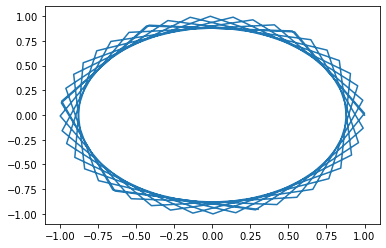

In [35]:
# Task 5.3
%matplotlib inline 
import matplotlib.pyplot as plt

interval = np.arange( 0, 50, 1)
y1 = np.sin( interval)
x1 = np.cos( interval)

# call the plt package and 
plt.plot(x1, y1)
# tell matplotlib to produce the plot
plt.show()

---
### Reduction Functions
Reduction functions perform summary operations on arrays or matrices and condense the result into a single value or an array of values based on a specified axis, providing a summary or statistical insight into the data. They are particularly useful when working with large datasets and performing data analysis.

By specifying the desired axis parameter, you can control whether the reduction is applied along rows or columns. An axis=0 is along the row axis and an axis=1 is summarized along the column axis.  

---

This can be confusing....For example:

In [36]:
ary = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
ary

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

When specifying **axis=0**, it means that the operation is applied across the rows. This implies that the resulting output will have the same size as the columns of the input data. 

In other words, **the operation is performed vertically**, considering each column as a separate entity.

In [37]:
ary.mean(axis=0) # column mean

array([3., 4., 5., 6.])

**When specifying axis=1, the operation is performed horizontally**, considering each row as a separate entity.

In [38]:
ary.mean(axis=1) # row mean

array([2.5, 6.5])

When an axis is not provided the action is performed across the whole array or matrix.

In [39]:
ary.mean()

4.5

There are many useful reduction operations:
    
- `np.mean` (computes arithmetic mean or average)
- `np.std` (computes the standard deviation)
- `np.var` (computes variance)
- `np.sort` (sorts an array)
- `np.argsort` (returns indices that would sort an array)
- `np.min` (returns the minimum value of an array)
- `np.max` (returns the maximum value of an array)
- `np.argmin` (returns the index of the minimum value)
- `np.argmax` (returns the index of the maximum value)
- `np.array_equal` (checks if two arrays have the same shape and elements)

#### *Task 5.4: Task: Axis Parameter in NumPy Functions*

Using the numpy array below:

1. Use the `np.mean()` function to calculate the mean of the entire array. Print the result.

2. Use the `np.max()` function to calculate the max along the rows. Print the result.

3. Use the `np.var()` function to calculate the variance along the columns. Print the result.

In [40]:
# Task 5.4
ary = np.array([[ 1,  2,  3, 4], 
                [ 5,  6,  7, 8], 
                [12, 11, 10, 9]])

print( 'whole mean', np.mean( ary))

print( 'row maxs', np.max( ary, axis=1))

print( 'col vars', np.var( ary, axis=0))

whole mean 6.5
row maxs [ 4  8 12]
col vars [20.66666667 13.55555556  8.22222222  4.66666667]


---
### Random Data

In [41]:
from numpy import random

In [42]:
# uniform random numbers from 0 to 1
random.rand(3,3)

array([[0.01113526, 0.98432242, 0.83729175],
       [0.61169148, 0.94937569, 0.39037081],
       [0.58262664, 0.14282291, 0.51685207]])

In [43]:
# standard normal distributed random numbers
random.randn(3,3)

array([[-0.86559128, -1.60740461,  0.73854989],
       [-1.64333626,  0.82300499,  1.13520432],
       [ 0.48245451, -0.43733759,  1.19134162]])

In [44]:
# numpy random contains many types of distributions
random.negative_binomial( n=5, p=0.25, size=10)

array([ 4,  6, 13, 26, 21,  4, 12,  6, 17, 23])

<br>

#### Task 5.5: Plotting a Normal Distribution
1. Generate a 10x100 matrix of random numbers sampled from a normal distribution.

2. Reshape or flatten the matrix into an 1D array. 

3. Using matplotlib plot the distribution of the data in histogram plot.

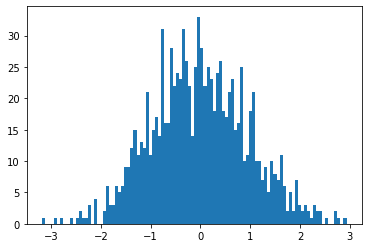

In [54]:
# Task 5.5

rand_norm = np.random.randn(10,100)

# this can be accomplished a few ways
flat = rand_norm.reshape(1000,)
flat = rand_norm.flatten()

plt.hist( flat, bins=100)
plt.show()

## Accessing and modifying multidimensional array elements

To access or set individual elements of the array, we can index with a sequence of numbers:

In [55]:
arr = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
arr

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [56]:
# set the 3rd element in the 1st row to 0
arr[0, 2] = 0
arr

array([[1, 2, 0, 4],
       [5, 6, 7, 8]])

We can also access the element on it's own, without having the equals sign and the stuff to the right of it:

In [57]:
arr[0, 2]

0

We frequently will want to access ranges of elements. In NumPy, the first dimension (or *axis*) corresponds to the rows of the array, and the second axis corresponds to the columns.

<div class="alert alert-warning">Note: be careful about setting modifying an array if what you really want is a <i>copy</i> of an array. Remember that in Python, variables are really just pointers to objects.</div>

For example, if I want to create a second array that mutliples every other value in `arr` by two, the following code will work but will have unexpected consequences:

In [58]:
arr = np.arange(10)
arr2 = arr
arr2[::2] = arr2[::2] * 2
print("arr:  " + str(arr))
print("arr2: " + str(arr2))

arr:  [ 0  1  4  3  8  5 12  7 16  9]
arr2: [ 0  1  4  3  8  5 12  7 16  9]


Note that `arr` and `arr2` both have the same values! This is because the line `arr2 = arr` doesn't actually copy the array: it just makes another pointer to the same object. To truly copy the array, we need to use the `.copy()` method:

In [59]:
arr = np.arange(10)
arr2 = arr.copy()
arr2[::2] = arr2[::2] * 2
print("arr:  " + str(arr))
print("arr2: " + str(arr2))

arr:  [0 1 2 3 4 5 6 7 8 9]
arr2: [ 0  1  4  3  8  5 12  7 16  9]


## Indexing

<div class="alert alert-info">Also like lists, we can use "slicing" to get different parts of the array. Slices look like
<code>myarray[a:b:c]</code>, where <code>a</code>, <code>b</code>, and <code>c</code> are all optional (though you have to specify at least one). <code>a</code> is the index of the beginning of the slice, <code>b</code> is the index of the end of the slice (exclusive), and <code>c</code> is the step size.
</div>

Note that the exclusive slice indexing described above is different than some other languages you may be familiar with, like Matlab and R. `myarray[1:2]` returns only the second elment in myarray in Python, instead of the first and second element. 

First, let's quickly look at what is in our array (defined above), for reference:

In [60]:
print("myarray:", myarray)

myarray: [ 3  6  1  0 10  3]


Now, to get all elements except the first:

In [61]:
myarray[1:]

array([ 6,  1,  0, 10,  3])

To get all elements except the last:

In [62]:
myarray[:-1]

array([ 3,  6,  1,  0, 10])

To get all elements except the first and the last:

In [63]:
myarray[1:-1]

array([ 6,  1,  0, 10])

To get every other element of the array (beginning from the *first* element):

In [64]:
myarray[::2]

array([ 3,  1, 10])

To get every element of the array (beginning from the *second* element):

In [65]:
myarray[1::2]

array([6, 0, 3])

And to reverse the array:

In [66]:
myarray[::-1]

array([ 3, 10,  0,  1,  6,  3])

Index slicing works exactly the same way for multidimensional "Matrix" arrays:

In [67]:
A = np.array([[n+m*10 for n in range(5)] for m in range(5)])

A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [68]:
# a block from the original array
A[1:4, 1:4]

array([[11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

In [69]:
# strides
A[::2, ::2]

array([[ 0,  2,  4],
       [20, 22, 24],
       [40, 42, 44]])

<br>

#### *Task 5.6: Indexing and Manipulating Multidimensional Arrays*

Using the provided array:

1. Use indexing to extract and print the element at row index 1 and column index 2.

2. Update the element at row index 1 and column index 2 to 100.

3. Print the updated my_array to verify the change.

4. Use slicing to extract a subarray from my_array containing the elements from rows 1 to 2 (inclusive) and columns 2 to 3 (inclusive).

5. Print the extracted subarray to see its content.

In [70]:
# Task 5.6
numarr = np.array([[1, 2, 3, 4],
                   [5, 6, 7, 8],
                   [9,10,11,12]])

print( numarr[1,2])

numarr[1,2] = 100
print( numarr)

print( numarr[:2,1:3])

7
[[  1   2   3   4]
 [  5   6 100   8]
 [  9  10  11  12]]
[[  2   3]
 [  6 100]]


## Boolean Indexing
Boolean Indexing in NumPy allows you to select elements from an array based on a condition or Boolean mask. By using logical expressions, you can create Boolean arrays that serve as filters to extract specific elements that meet the desired criteria. This indexing technique is useful for filtering, subsetting, and manipulating array data based on logical conditions.

In [71]:
rand_arry = np.random.randint(0, 10, 5)
rand_arry

array([0, 0, 1, 2, 3])

Numpy arrays will perform a comparison element wise, which will return an bool numpy array

In [72]:
rand_mk = rand_arry>=5
rand_mk

array([False, False, False, False, False])

`~` operator with invert the book mask

In [73]:
~rand_mk

array([ True,  True,  True,  True,  True])

We can use this boolean mask to filter a numpy array

In [74]:
print( rand_arry[rand_mk])
print( rand_arry[~rand_mk])

[]
[0 0 1 2 3]


**Boolean indexing in numpy allows you to filter data based on multiple conditions. However, since the comparisons are performed element-wise (element-to-element) in numpy, logical combinations using `&` and `|` are used for performing the logical AND and OR operations between elements.** 

In [75]:
temps = np.array([23, 28, 19, 30, 25, 22, 27, 18])

# Filter temperatures between 20 and 30 degrees Celsius
mask = (temps > 20) and (temps < 30)
filtered_temps = temps[mask]
print(filtered_temps)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

The full syntax is:

`(condition1) & (condition2)`

In [76]:
temps = np.array([23, 28, 19, 30, 25, 22, 27, 18])

# Filter temperatures between 20 and 30 degrees Celsius
mask = (temps > 20) & (temps < 30)
filtered_temps = temps[mask]

print(filtered_temps)

[23 28 25 22 27]


They are also very handy for assigning values.

In [77]:
temperatures = np.array([23, 28, 19, 30, 25, 22, 27, 18])

# Assign 0 to temperatures greater than 25 degrees Celsius
temperatures[temperatures > 25] = 0
print(temperatures)

[23  0 19  0 25 22  0 18]


<br>

#### *Task 5.7: Boolean Indexing*

Consider the NumPy array given below representing student scores on a test. Create a boolean mask for test scores greater than or equal to 80. Use the mask to reassign them as grade of 'Pass' (>=80), or 'Fail' (<80). 

In [79]:
# Task 5.7
scores = np.array([70,75,80,82,77,100,96])
print( scores)

mask = scores>=80

scores[mask] = 100
scores[~mask] = 0

scores

[ 70  75  80  82  77 100  96]


array([  0,   0, 100, 100,   0, 100, 100])

<br>

---
<a id='2.1'></a>

## 2.4 Exercises

### Exercise 1: Euclidean distance (2 points)

Recall that the Euclidean distance $d$ is given by the following equation:

$$
d(a, b) = \sqrt{\sum_{i=1}^N (a_i - b_i) ^ 2}
$$

In NumPy, this is a fairly simple computation because we can rely on array computations and the `np.sum` function to do all the heavy lifting for us.

<div class="alert alert-success">
Complete the function <code>euclidean_distance</code> below to compute $d(a,b)$, as given by the equation above. Note that you can compute the square root using <code>np.sqrt</code>.
</div>

In [86]:
def euclidean_distance(a, b):
    """Computes the Euclidean distance between a and b.
    
    Hint: your solution can be done in a single line of code!
    
    Parameters
    ----------
    a, b : numpy arrays or scalars with the same size
    
    Returns
    -------
    the Euclidean distance between a and b
    
    """
    # YOUR CODE HERE
    distance = np.sqrt(np.sum((a-b)**2))
    return( distance)

<div class="alert alert-warning">Remember that you need to execute the cell above (with your definition of <code>euclidean_distance</code>), and then run the cell below to check your answer. If you make changes to the cell with your answer, you will need to <i>first</i> re-run that cell, and <i>then</i> re-run the test cell to check your answer again.</div>

In [90]:
# add your own test cases in this cell!
euclidean_distance(4,2)

2.0

The code below will check you have coded the euclidean_distance function correctly.

In [91]:
from nose.tools import assert_equal, assert_raises

# check euclidean distance of size 3 integer arrays
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
assert_equal(euclidean_distance(a, b), 5.196152422706632)

# check euclidean distance of size 4 float arrays
x = np.array([3.6, 7., 203., 3.])
y = np.array([6., 20.2, 1., 2.])
assert_equal(euclidean_distance(x, y), 202.44752406487959)

# check euclidean distance of scalars
assert_equal(euclidean_distance(1, 0.5), 0.5)

# check that an error is thrown if the arrays are different sizes
a = np.array([1, 2, 3])
b = np.array([4, 5])
assert_raises(ValueError, euclidean_distance, a, b)
assert_raises(ValueError, euclidean_distance, b, a)

print("Success!")

Success!


In [92]:
def border(n, m):
    """Creates an array with shape (n, m) that is all zeros
    except for the border (i.e., the first and last rows and
    columns), which should be filled with ones.

    Hint: you should be able to do this in three lines
    (including the return statement)

    Parameters
    ----------
    n, m: int
        Number of rows and number of columns

    Returns
    -------
    numpy array with shape (n, m)

    """
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
from numpy.testing import assert_array_equal
from nose.tools import assert_equal

# check a few small examples explicitly
assert_array_equal(border(1, 1), [[1]])
assert_array_equal(border(2, 2), [[1, 1], [1, 1]])
assert_array_equal(border(3, 3), [[1, 1, 1], [1, 0, 1], [1, 1, 1]])
assert_array_equal(border(3, 4), [[1, 1, 1, 1], [1, 0, 0, 1], [1, 1, 1, 1]])

# check a few large and random examples
for i in range(10):
    n, m = np.random.randint(2, 1000, 2)
    result = border(n, m)

    # check dtype and array shape
    assert_equal(result.dtype, np.float)
    assert_equal(result.shape, (n, m))

    # check the borders
    assert (result[0] == 1).all()
    assert (result[-1] == 1).all()
    assert (result[:, 0] == 1).all()
    assert (result[:, -1] == 1).all()

    # check that everything else is zero
    assert np.sum(result) == (2*n + 2*m - 4)

print("Success!")